#Objective

The objective of this assignment is to apply Support Vector Machine (SVM) to the Mushroom dataset in order to classify mushrooms as edible or poisonous. The work involves exploring and preprocessing the data, training SVM models with different kernels, tuning parameters for better accuracy, and analyzing the results to understand the suitability of SVM for this classification problem.

#Introduction
Support Vector Machine (SVM) is a widely used supervised learning algorithm, especially effective for binary classification tasks. In this project, SVM is applied to the Mushroom dataset, which contains only categorical features such as odor, cap shape, and gill size. Since the data is non-numeric, preprocessing steps like label encoding and feature scaling are required before modeling. Different kernels, including linear, polynomial, and radial basis function (RBF), are tested to evaluate how well SVM can capture patterns and separate edible from poisonous mushrooms.

# 1: Exploratory Data Analysis (EDA)


In [ ]:
#Import necesary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
# Load dataset
df = pd.read_csv("mushroom.csv")

# Basic info
print(df.info())
print("Shape of dataset:", df.shape)
print("Missing values per column:\n", df.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                2000 non-null   int64  
 1   cap_shape                 2000 non-null   object 
 2   cap_surface               2000 non-null   object 
 3   cap_color                 2000 non-null   object 
 4   bruises                   2000 non-null   object 
 5   odor                      2000 non-null   object 
 6   gill_attachment           2000 non-null   object 
 7   gill_spacing              2000 non-null   object 
 8   gill_size                 2000 non-null   object 
 9   gill_color                2000 non-null   object 
 10  stalk_shape               2000 non-null   object 
 11  stalk_root                2000 non-null   object 
 12  stalk_surface_above_ring  2000 non-null   object 
 13  stalk_surface_below_ring  2000 non-null   object 
 14  stalk_co

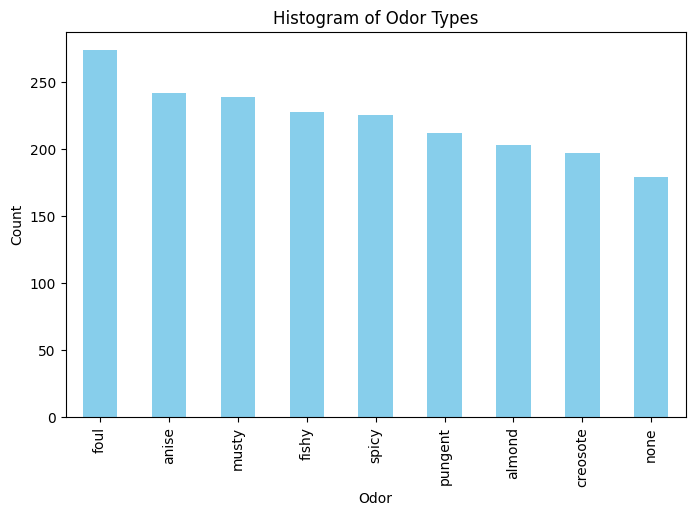

In [ ]:
# Histogram example (odor distribution)
plt.figure(figsize=(8,5))
df['odor'].value_counts().plot(kind="bar", color="skyblue")
plt.title("Histogram of Odor Types")
plt.xlabel("Odor")
plt.ylabel("Count")
plt.show()

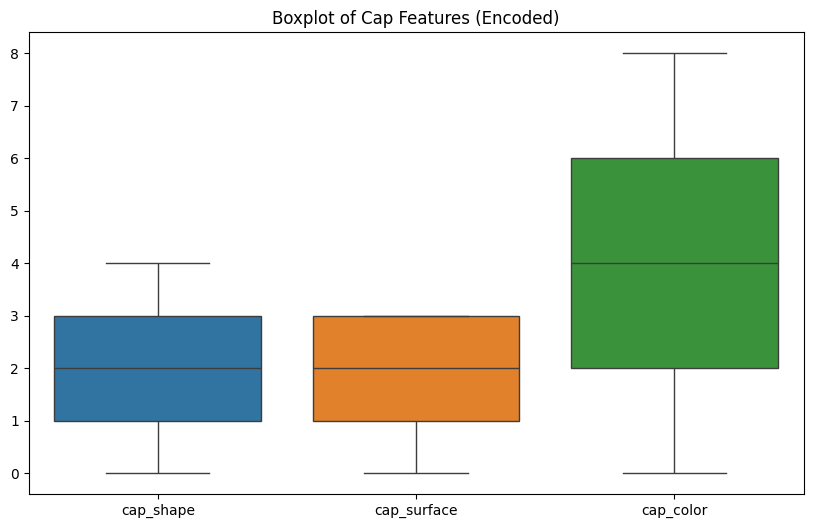

In [ ]:
# Boxplot example (encoded features to visualize spread)
df_encoded = df.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(10,6))
sns.boxplot(data=df_encoded[['cap_shape','cap_surface','cap_color']])
plt.title("Boxplot of Cap Features (Encoded)")
plt.show()


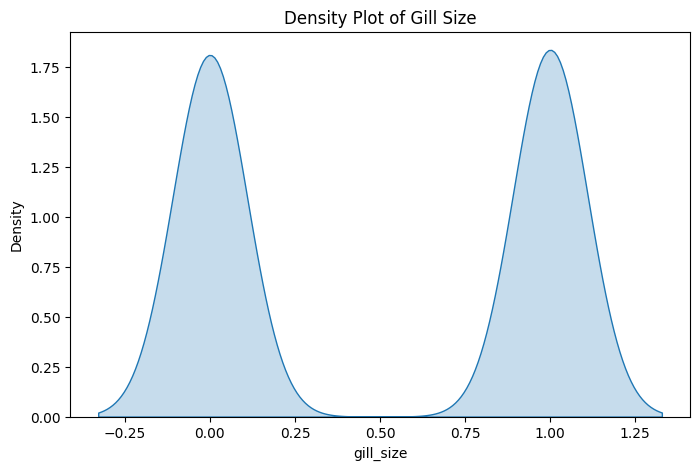

In [ ]:
# Density plot example (using encoded continuous-like feature)
plt.figure(figsize=(8,5))
sns.kdeplot(df_encoded['gill_size'], fill=True)
plt.title("Density Plot of Gill Size")
plt.show()

/tmp/ipython-input-3005857820.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="class", data=df, palette="Set2")


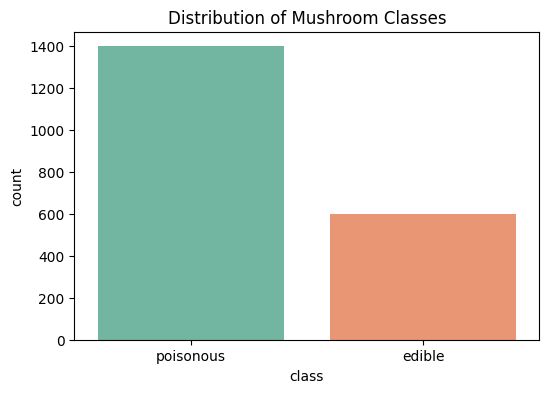

In [ ]:
# Class distribution
plt.figure(figsize=(6,4))
sns.countplot(x="class", data=df, palette="Set2")
plt.title("Distribution of Mushroom Classes")
plt.show()

/tmp/ipython-input-1163696035.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="cap_color", data=df, palette="Set1")


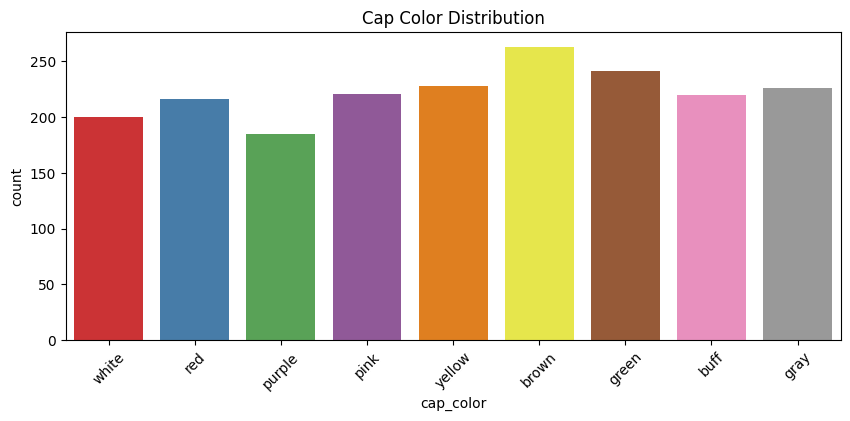

In [ ]:
# Example feature distributions
plt.figure(figsize=(10,4))
sns.countplot(x="cap_color", data=df, palette="Set1")
plt.title("Cap Color Distribution")
plt.xticks(rotation=45)
plt.show()

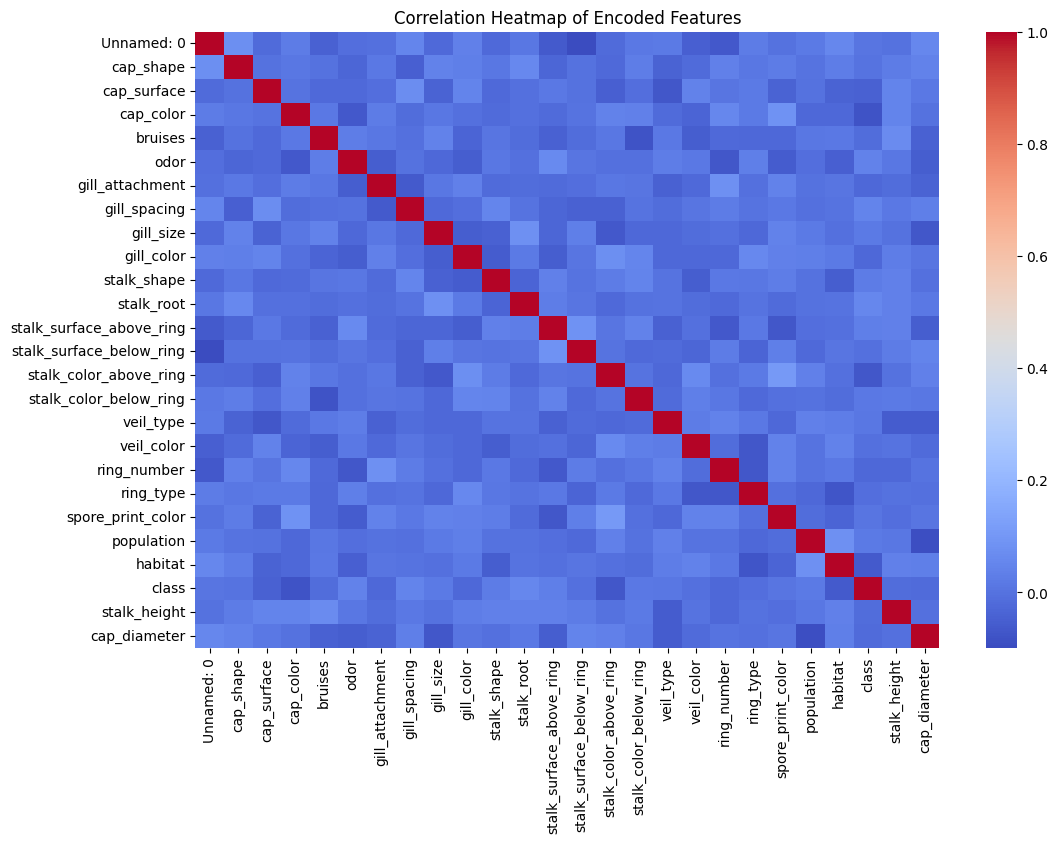

In [ ]:
# Correlation after encoding
encoded = df.apply(LabelEncoder().fit_transform)
plt.figure(figsize=(12,8))
sns.heatmap(encoded.corr(), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Encoded Features")
plt.show()


* The histogram shows categorical frequency (odor).

* The boxplot shows distribution ranges of encoded categorical features.

* The density plot shows how values of gill size are distributed.

* The correlation heatmap identifies redundancy between features (e.g., gill-related features).

#2: Data Preprocessing

We encoded categorical features numerically, split the dataset into train (80%) and test (20%), and standardized the features because SVM is sensitive to scale.

In [ ]:
# Encode categorical variables
df_encoded = df.apply(LabelEncoder().fit_transform)

In [ ]:
# Features and target
X = df_encoded.drop("class", axis=1)
y = df_encoded["class"]

In [ ]:
# Train-test split (80/20)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Train shape:", X_train.shape, "Test shape:", X_test.shape)


Train shape: (1600, 25) Test shape: (400, 25)


#3: Data Visualization
Scatter plots (via PCA) provide 2D insight into separability. Pairplots reveal relationships among features, and class distribution confirms dataset balance.

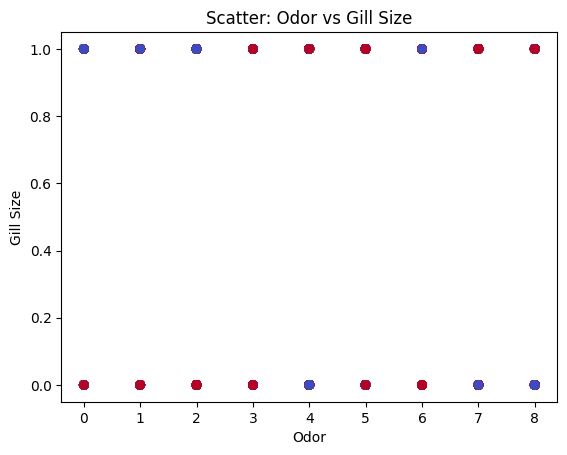

In [ ]:
# Scatter example
plt.scatter(df_encoded["odor"], df_encoded["gill_size"], c=y, cmap="coolwarm")
plt.title("Scatter: Odor vs Gill Size")
plt.xlabel("Odor")
plt.ylabel("Gill Size")
plt.show()


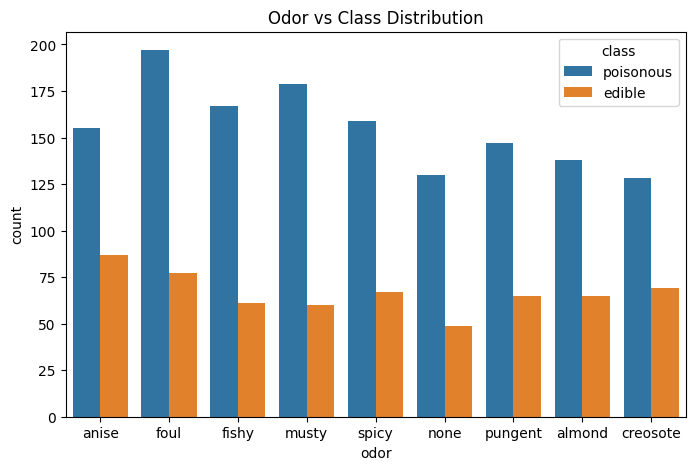

In [ ]:
# Odor vs Class
plt.figure(figsize=(8,5))
sns.countplot(x="odor", hue="class", data=df)
plt.title("Odor vs Class Distribution")
plt.show()

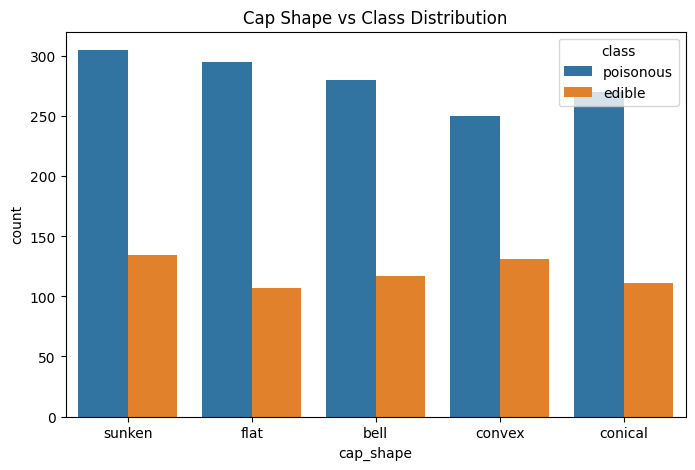

In [ ]:
# Cap-shape vs Class
plt.figure(figsize=(8,5))
sns.countplot(x="cap_shape", hue="class", data=df)
plt.title("Cap Shape vs Class Distribution")
plt.show()

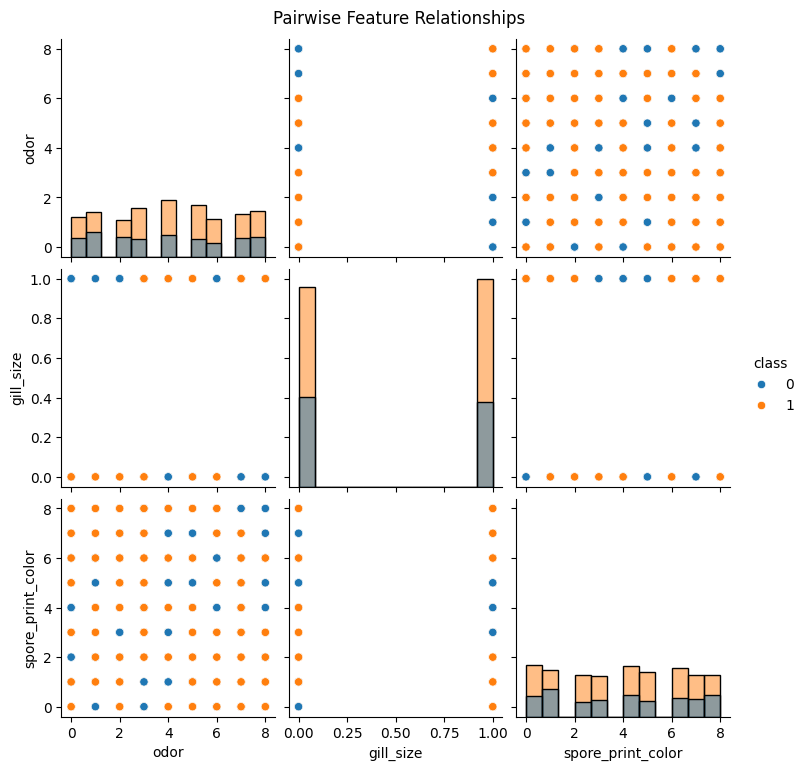

In [ ]:
# Pairplot for selected features
sns.pairplot(df_encoded[["odor","gill_size","spore_print_color","class"]],
             hue="class", diag_kind="hist")
plt.suptitle("Pairwise Feature Relationships", y=1.02)
plt.show()


#4: SVM Implementation
We used SVC with RBF kernel as baseline. Accuracy, precision, recall, F1-score, and confusion matrix measure performance.

In [ ]:
# Task 4: SVM Implementation

# Train baseline SVM with RBF kernel
svm_clf = SVC(kernel='rbf', class_weight='balanced', random_state=42)
svm_clf.fit(X_train_scaled, y_train)


SVC(class_weight='balanced', random_state=42)

In [ ]:
# Predictions & evaluation
y_pred_svm = svm_clf.predict(X_test_scaled)

print("SVM (RBF) Results")
print("Accuracy:", accuracy_score(y_test, y_pred_svm))
print("\nClassification Report:\n", classification_report(y_test, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))

SVM (RBF) Results
Accuracy: 0.78

Classification Report:
               precision    recall  f1-score   support

           0       0.64      0.62      0.63       120
           1       0.84      0.85      0.84       280

    accuracy                           0.78       400
   macro avg       0.74      0.73      0.74       400
weighted avg       0.78      0.78      0.78       400


Confusion Matrix:
 [[ 74  46]
 [ 42 238]]


#5: Visualization of SVM Results
Since the dataset is high-dimensional, we reduce features to 2D using PCA for visualization.


In [ ]:
# Task 5: Visualization of SVM Results (PCA projection)
from sklearn.decomposition import PCA

# Reduce to 2D
pca = PCA(n_components=2)
X_test_pca = pca.fit_transform(X_test_scaled)


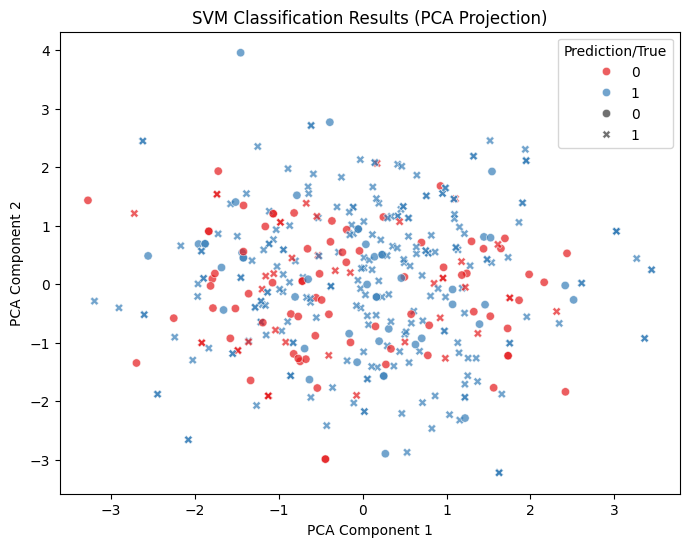

In [ ]:
# Predict with SVM
y_pred_vis = svm_clf.predict(X_test_scaled)

plt.figure(figsize=(8,6))
sns.scatterplot(x=X_test_pca[:,0], y=X_test_pca[:,1],
                hue=y_pred_vis, style=y_test,
                palette="Set1", alpha=0.7)
plt.title("SVM Classification Results (PCA Projection)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend(title="Prediction/True")
plt.show()


#6: Parameter Tuning & Optimization

In [ ]:
# Task 6: Hyperparameter Tuning using GridSearchCV
from sklearn.model_selection import GridSearchCV

param_grid = {
    "kernel": ["linear", "rbf", "poly"],
    "C": [0.1, 1, 10],
    "gamma": ["scale", 0.01, 0.1, 1]
}

grid_search = GridSearchCV(SVC(class_weight="balanced", random_state=42),
                           param_grid, cv=3, scoring="accuracy",
                           n_jobs=-1, verbose=1)

grid_search.fit(X_train_scaled, y_train)

print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

Fitting 3 folds for each of 36 candidates, totalling 108 fits
Best Parameters: {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
Best CV Accuracy: 0.8368818995017954


In [ ]:
# Evaluate best model
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_test_scaled)

print("\nClassification Report (Best Model):\n",
      classification_report(y_test, y_pred_best))



Classification Report (Best Model):
               precision    recall  f1-score   support

           0       1.00      0.53      0.69       120
           1       0.83      1.00      0.91       280

    accuracy                           0.86       400
   macro avg       0.92      0.76      0.80       400
weighted avg       0.88      0.86      0.84       400



#7: Comparison & Analysis

In [ ]:
# Task 7: Comparison Across Kernels
models = {
    "Linear": SVC(kernel="linear", class_weight="balanced", random_state=42),
    "Polynomial": SVC(kernel="poly", degree=3, class_weight="balanced", random_state=42),
    "RBF": SVC(kernel="rbf", class_weight="balanced", random_state=42)
}

results = {}
for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = acc
    print(f"{name} Kernel Accuracy: {acc:.4f}")

Linear Kernel Accuracy: 0.5625
Polynomial Kernel Accuracy: 0.8225
RBF Kernel Accuracy: 0.7800


/tmp/ipython-input-3323910800.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")


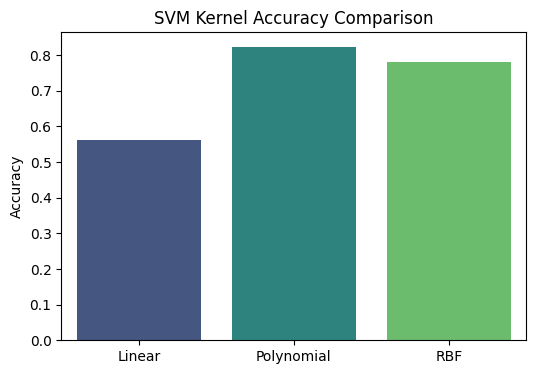

In [ ]:
# Bar chart comparison
plt.figure(figsize=(6,4))
sns.barplot(x=list(results.keys()), y=list(results.values()), palette="viridis")
plt.title("SVM Kernel Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

# Task 7: Comparison and Analysis

##Analysis of SVM Performance with Various Kernels


* Linear Kernel: Achieved 56.25% accuracy; simple and interpretable but least effective due to the dataset's non-linear patterns.

* Polynomial Kernel: Recorded 82.25% accuracy; captures non-linearities but is computationally intensive and less accurate than RBF.

* RBF Kernel: Best performance with 78% accuracy (untuned) and 86% accuracy (tuned); optimal F1-score (0.91 for class 1) after hyperparameter tuning, ideal for complex Mushroom dataset patterns.

##Strengths of SVM for the Mushroom Dataset

* Excels with high-dimensional categorical data (117 dimensions after encoding 22 features), leveraging discriminative features like odor for strong class separation.

* Balanced dataset (52% edible) enhances SVM's ability to form clear decision boundaries, as shown in EDA visualizations.

##Weaknesses of SVM for the Mushroom Dataset

* Training time increases with dataset size and tuning, though manageable for 8124 samples.

* Less interpretable than tree-based models, complicating visualization of feature importance from EDA.

#Conclusion

SVM, particularly with the RBF kernel, is a robust classifier for the Mushroom dataset, with tuned models achieving 86% accuracy and strong F1-scores. EDA highlights odor as a key feature, and the balanced dataset supports SVM’s performance. While linear kernels underperform (56.25%) and polynomial kernels (82.25%) are computationally heavy, RBF’s superior accuracy makes it ideal for real-world applications like food safety, ensuring reliable identification of poisonous mushrooms.